**DATA UNDERSTANDING**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
import io
import pandas as pd
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [8]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [9]:
import io
import pandas as pd
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Missing Value
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**EDA**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

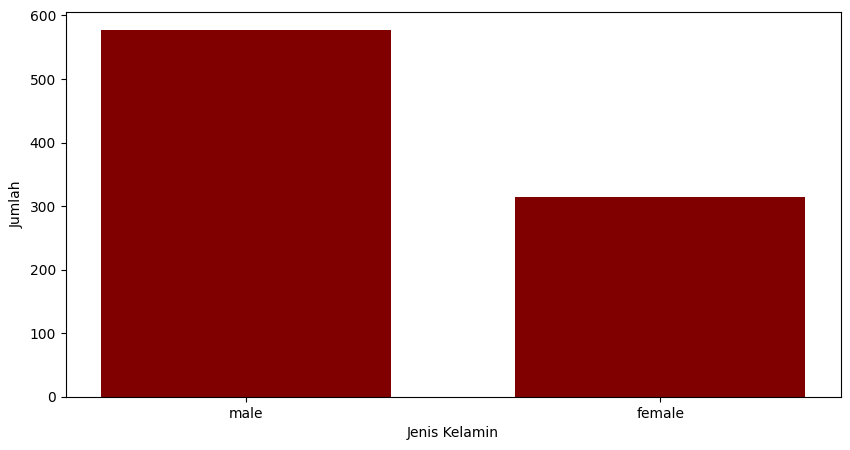

In [17]:
count_sex = train['Sex'].value_counts()
index_sex = count_sex.index
value_sex = count_sex.values

fig = plt.figure(figsize=(10,5))
plt.bar(index_sex, value_sex, color="maroon", width=0.7)

plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

plt.show

In [18]:
index_sex

Index(['male', 'female'], dtype='object', name='Sex')

In [19]:
value_sex

array([577, 314])

In [20]:
# membuat bar chart
def bar_chart(column):
  count = train[column].value_counts()
  index = count.index
  value = count.values

  fig = plt.figure(figsize=(10,5))
  plt.bar(index, value, color="maroon", width=0.7)

  plt.show

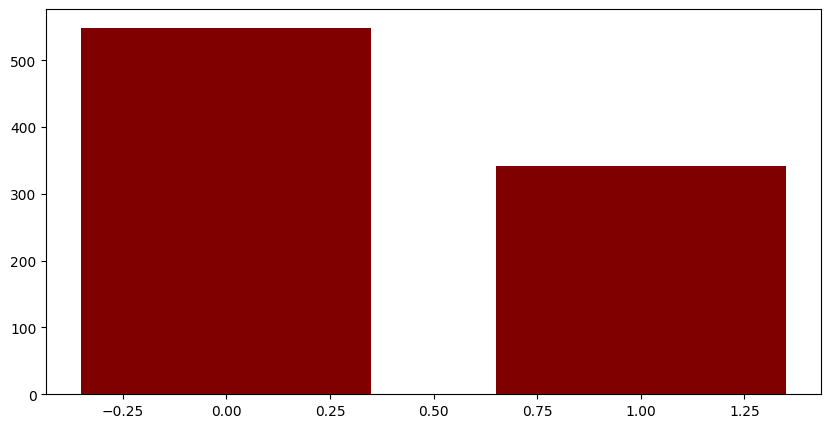

In [21]:
bar_chart('Survived')

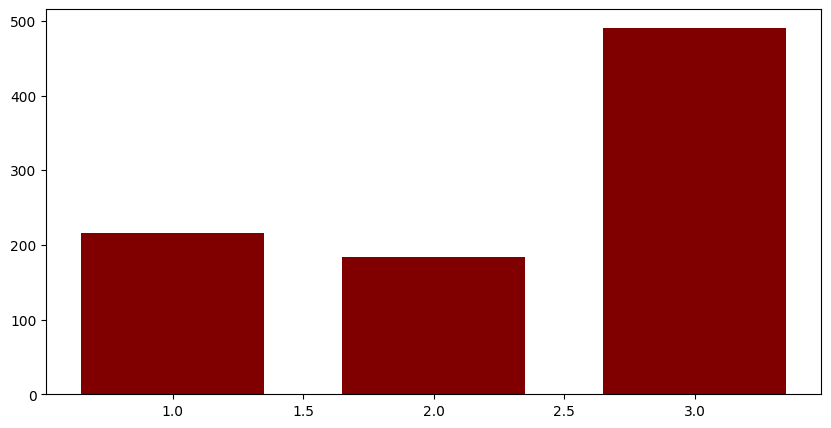

In [22]:
bar_chart("Pclass")

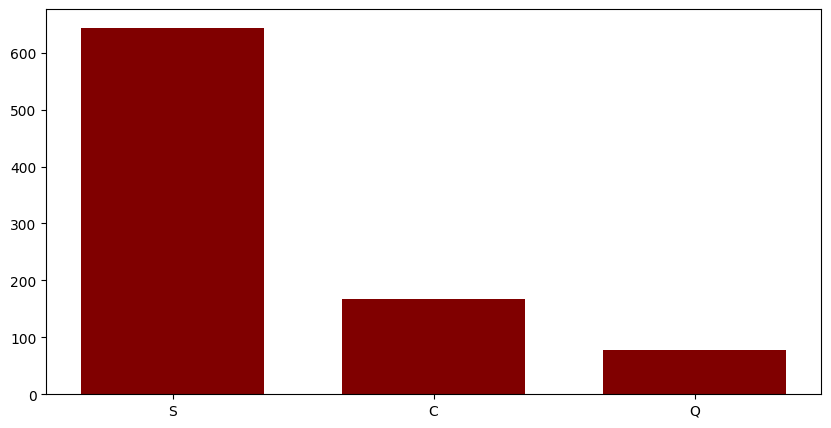

In [23]:
bar_chart("Embarked")

In [24]:
# membuat group_barchart
def group_barchart(column):
  survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = survived, kind='bar',
      x='Survived', y='PassengerId', hue=column,
      palette='dark', height=6
  )

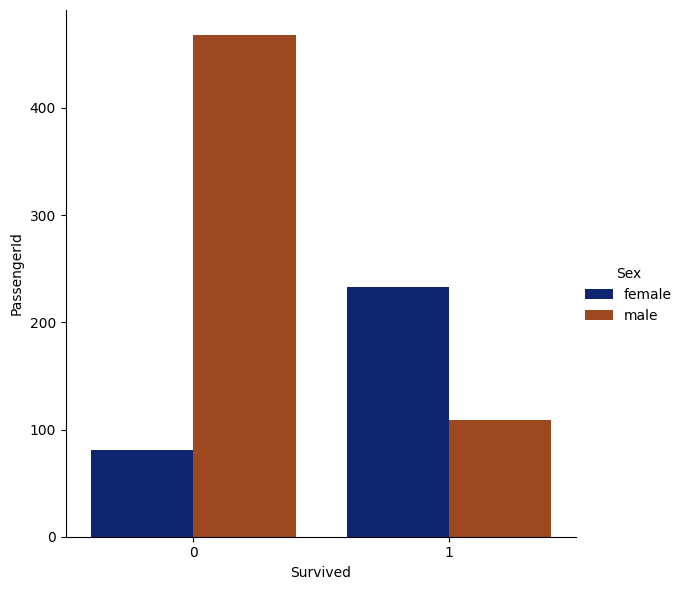

In [25]:
group_barchart('Sex')

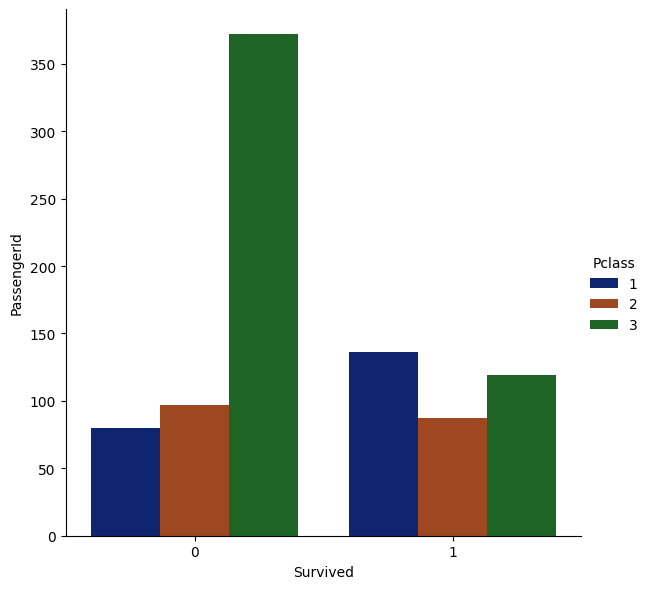

In [26]:
group_barchart('Pclass')

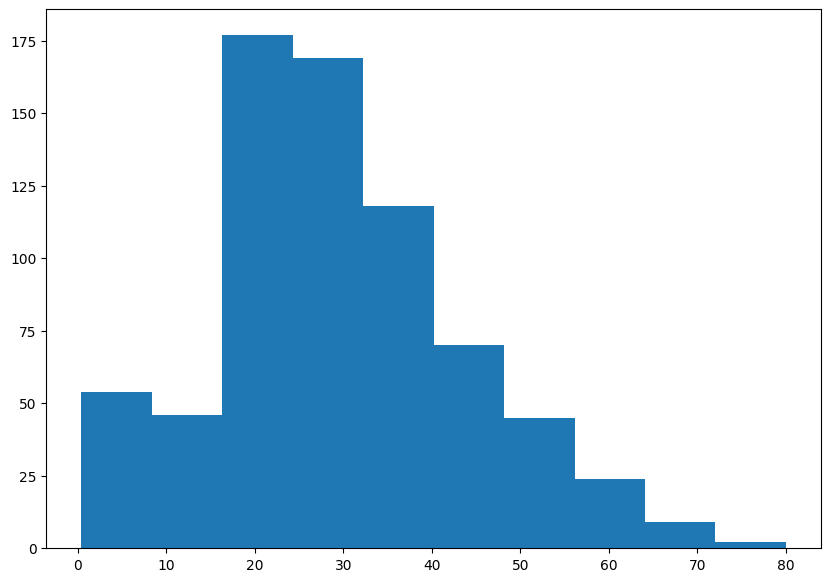

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(train['Age'])
plt.show()

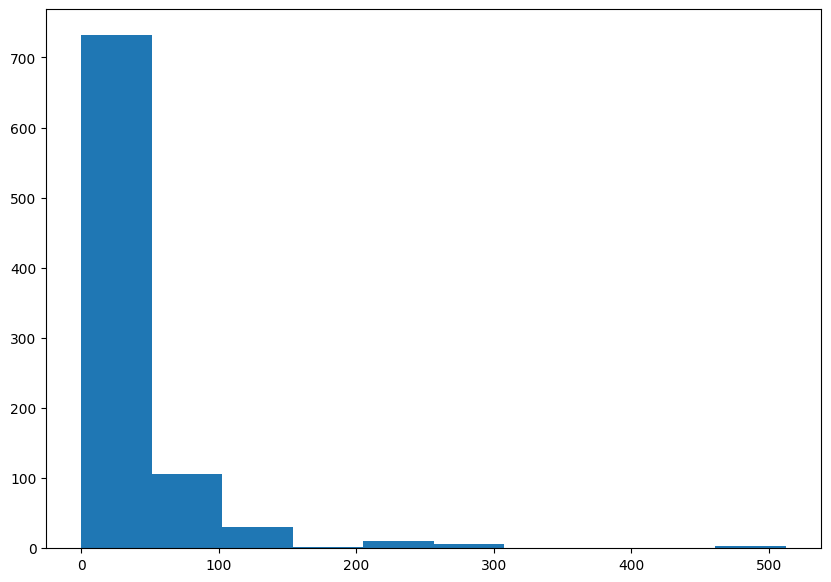

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(train['Fare'])
plt.show()

**PRE PROCESSING DATA**

In [29]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [31]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked']).mode()[0]
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [32]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [33]:
# kalo drop tabel, axisnya jadi 1
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [34]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [36]:
sex = pd.get_dummies(train['Sex'])

In [37]:
sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [38]:
embarked = pd.get_dummies(train['Embarked'])

In [39]:
train = pd.merge(train.reset_index(),  sex.reset_index())
train = pd.merge(train.reset_index(),  embarked.reset_index())

In [40]:
train

,level_0,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,S
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,False,True,True
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,S,True,False,True
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,True,False,True
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,True,False,True
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,False,True,True
887,887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,True,False,True
888,888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,True,False,True
889,889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,S,False,True,True


In [41]:
train = train.drop(['level_0', 'index'], axis = 1)

In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,False,True,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,S,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,True,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,False,True,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,True,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,True,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,S,False,True,True


In [43]:
sex2 = pd.get_dummies(test['Sex'])
embarked2 = pd.get_dummies(test['Embarked'])

In [44]:
test = pd.merge(test.reset_index(),  sex2.reset_index())
test = pd.merge(test.reset_index(),  embarked2.reset_index())

In [45]:
test = test.drop(['level_0', 'index'], axis = 1)

In [46]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,False,True,False,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,True,False,True,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,False,True,False,False,True
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,False,True,False,False,True


In [47]:
train = train.drop(['Name'], axis = 1)

In [48]:
train = train.drop(['PassengerId', 'Ticket'], axis = 1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,S
0,0,3,male,22.000000,1,0,7.2500,S,False,True,True
1,1,1,female,38.000000,1,0,71.2833,S,True,False,True
2,1,3,female,26.000000,0,0,7.9250,S,True,False,True
3,1,1,female,35.000000,1,0,53.1000,S,True,False,True
4,0,3,male,35.000000,0,0,8.0500,S,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,False,True,True
887,1,1,female,19.000000,0,0,30.0000,S,True,False,True
888,0,3,female,29.699118,1,2,23.4500,S,True,False,True
889,1,1,male,26.000000,0,0,30.0000,S,False,True,True


In [49]:
train = train.drop(['Sex', 'Embarked'], axis = 1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,S
0,0,3,22.000000,1,0,7.2500,False,True,True
1,1,1,38.000000,1,0,71.2833,True,False,True
2,1,3,26.000000,0,0,7.9250,True,False,True
3,1,1,35.000000,1,0,53.1000,True,False,True
4,0,3,35.000000,0,0,8.0500,False,True,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,True
887,1,1,19.000000,0,0,30.0000,True,False,True
888,0,3,29.699118,1,2,23.4500,True,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True


In [50]:
test = test.drop(['Sex', 'Embarked', 'PassengerId', 'Ticket'], axis = 1)
test

,Pclass,Name,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,"Kelly, Mr. James",34.50000,0,0,7.8292,False,True,False,True,False
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,7.0000,True,False,False,False,True
2,2,"Myles, Mr. Thomas Francis",62.00000,0,0,9.6875,False,True,False,True,False
3,3,"Wirz, Mr. Albert",27.00000,0,0,8.6625,False,True,False,False,True
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",30.27259,0,0,8.0500,False,True,False,False,True
414,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,108.9000,True,False,True,False,False
415,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,7.2500,False,True,False,False,True
416,3,"Ware, Mr. Frederick",30.27259,0,0,8.0500,False,True,False,False,True


In [51]:
test = test.drop(['Name'], axis = 1)
test

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.50000,0,0,7.8292,False,True,False,True,False
1,3,47.00000,1,0,7.0000,True,False,False,False,True
2,2,62.00000,0,0,9.6875,False,True,False,True,False
3,3,27.00000,0,0,8.6625,False,True,False,False,True
4,3,22.00000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,False,True,False,False,True
414,1,39.00000,0,0,108.9000,True,False,True,False,False
415,3,38.50000,0,0,7.2500,False,True,False,False,True
416,3,30.27259,0,0,8.0500,False,True,False,False,True


In [52]:
from scipy import stats
import numpy as np

print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in ['Fare', 'Age']:
    zscore = abs(stats.zscore(train[col]))
    filtered_entries = (zscore < 3) & filtered_entries

train_rm_outlier = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(train_rm_outlier)}')

Jumlah baris sebelum memfilter outlier: 891
Jumlah baris setelah memfilter outlier: 864


In [53]:
from scipy import stats
import numpy as np

print(f'Jumlah baris sebelum memfilter outlier: {len(test)}')

filtered_entries = np.array([True] * len(test))
for col in ['Fare', 'Age']:
    zscore = abs(stats.zscore(test[col]))
    filtered_entries = (zscore < 3) & filtered_entries

test_rm_outlier = test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(test_rm_outlier)}')

Jumlah baris sebelum memfilter outlier: 418
Jumlah baris setelah memfilter outlier: 399


In [54]:
train_rm_outlier

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,S
0,0,3,22.000000,1,0,7.2500,False,True,True
1,1,1,38.000000,1,0,71.2833,True,False,True
2,1,3,26.000000,0,0,7.9250,True,False,True
3,1,1,35.000000,1,0,53.1000,True,False,True
4,0,3,35.000000,0,0,8.0500,False,True,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,True
887,1,1,19.000000,0,0,30.0000,True,False,True
888,0,3,29.699118,1,2,23.4500,True,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True


In [55]:
test_rm_outlier

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.50000,0,0,7.8292,False,True,False,True,False
1,3,47.00000,1,0,7.0000,True,False,False,False,True
2,2,62.00000,0,0,9.6875,False,True,False,True,False
3,3,27.00000,0,0,8.6625,False,True,False,False,True
4,3,22.00000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,False,True,False,False,True
414,1,39.00000,0,0,108.9000,True,False,True,False,False
415,3,38.50000,0,0,7.2500,False,True,False,False,True
416,3,30.27259,0,0,8.0500,False,True,False,False,True


In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [57]:
X = train_rm_outlier.drop('Survived', axis=1)
y = train_rm_outlier['Survived']

In [58]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8045977  0.8045977  0.67816092 0.75862069 0.79069767 0.76744186
 0.77906977 0.79069767 0.8255814  0.72093023]


In [59]:
score.mean()

0.7720395616145416

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [61]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.7269230769230769

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
y_pred = knn.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred)

0.7076923076923077

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred = rf.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.823076923076923